In [1]:
#%matplotlib inline
#%matplotlib notebook

In [2]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [3]:
inputs = [
    ["20210630 TraR_Tube_001_001.fcs",0,0,'WT'],
    
    ["20210702 TraR rep1_Tube_002_002.fcs",1e-4,0,'TraR'],
    ["20210702 TraR rep1_Tube_003_003.fcs",1e-5,0,'TraR'],
    ["20210702 TraR rep1_Tube_004_004.fcs",1e-6,0,'TraR'],
    ["20210702 TraR rep1_Tube_005_005.fcs",1e-7,0,'TraR'],
    ["20210702 TraR rep1_Tube_006_006.fcs",1e-8,0,'TraR'],
    ["20210702 TraR rep1_Tube_007_007.fcs",1e-10,0,'TraR'],
    ["20210702 TraR rep1_Tube_008_008.fcs",1e-11,0,'TraR'],
    ["20210702 TraR rep1_Tube_009_009.fcs",0,0,'TraR'],
    
    ["20210702 TraR rep1_Tube_010_010.fcs",1e-4,0.005,'TraR'],
    ["20210702 TraR rep1_Tube_011_011.fcs",1e-5,0.005,'TraR'],
    ["20210702 TraR rep1_Tube_012_012.fcs",1e-6,0.005,'TraR'],
    ["20210702 TraR rep1_Tube_013_013.fcs",1e-7,0.005,'TraR'],
    ["20210702 TraR rep1_Tube_014_014.fcs",1e-8,0.005,'TraR'],
    ["20210702 TraR rep1_Tube_015_015.fcs",1e-10,0.005,'TraR'],
    ["20210702 TraR rep1_Tube_016_016.fcs",1e-11,0.005,'TraR'],
    ["20210702 TraR rep1_Tube_017_017.fcs",0,0.005,'TraR'],
    
    ["20210702 TraR rep1_Tube_018_018.fcs",1e-4,0.01,'TraR'],
    ["20210702 TraR rep1_Tube_019_019.fcs",1e-5,0.01,'TraR'],
    ["20210702 TraR rep1_Tube_020_020.fcs",1e-6,0.01,'TraR'],
    ["20210702 TraR rep1_Tube_021_021.fcs",1e-7,0.01,'TraR'],
    ["20210702 TraR rep1_Tube_022_022.fcs",1e-8,0.01,'TraR'],
    ["20210702 TraR rep1_Tube_023_023.fcs",1e-10,0.01,'TraR'],
    ["20210702 TraR rep1_Tube_024_024.fcs",1e-11,0.01,'TraR'],
    ["20210702 TraR rep1_Tube_025_025.fcs",0,0.01,'TraR'],
    
    ["20210702 TraR rep1_Tube_026_026.fcs",1e-4,0.05,'TraR'],
    ["20210702 TraR rep1_Tube_027_027.fcs",1e-5,0.05,'TraR'],
    ["20210702 TraR rep1_Tube_028_028.fcs",1e-6,0.05,'TraR'],
    ["20210702 TraR rep1_Tube_029_029.fcs",1e-7,0.05,'TraR'],
    ["20210702 TraR rep1_Tube_030_030.fcs",1e-8,0.05,'TraR'],
    ["20210702 TraR rep1_Tube_031_031.fcs",1e-10,0.05,'TraR'],
    ["20210702 TraR rep1_Tube_032_032.fcs",1e-11,0.05,'TraR'],
    ["20210702 TraR rep1_Tube_033_033.fcs",0,0.05,'TraR'],
    
    ["20210702 TraR rep1_Tube_034_034.fcs",1e-4,0.1,'TraR'],
    ["20210702 TraR rep1_Tube_035_035.fcs",1e-5,0.1,'TraR'],
    ["20210702 TraR rep1_Tube_036_036.fcs",1e-6,0.1,'TraR'],
    ["20210702 TraR rep1_Tube_037_037.fcs",1e-7,0.1,'TraR'],
    ["20210702 TraR rep1_Tube_038_038.fcs",1e-8,0.1,'TraR'],
    ["20210702 TraR rep1_Tube_039_039.fcs",1e-10,0.1,'TraR'],
    ["20210702 TraR rep1_Tube_040_040.fcs",1e-11,0.1,'TraR'],
    ["20210702 TraR rep1_Tube_041_041.fcs",0,0.1,'TraR'],
    
    ["20210702 TraR rep1_Tube_042_042.fcs",1e-4,0.5,'TraR'],
    ["20210702 TraR rep1_Tube_043_043.fcs",1e-5,0.5,'TraR'],
    ["20210702 TraR rep1_Tube_044_044.fcs",1e-6,0.5,'TraR'],
    ["20210702 TraR rep1_Tube_045_045.fcs",1e-7,0.5,'TraR'],
    ["20210702 TraR rep1_Tube_046_046.fcs",1e-8,0.5,'TraR'],
    ["20210702 TraR rep1_Tube_047_047.fcs",1e-10,0.5,'TraR'],
    ["20210702 TraR rep1_Tube_048_048.fcs",1e-11,0.5,'TraR'],
    ["20210702 TraR rep1_Tube_049_049.fcs",0,0.5,'TraR'],

   
    


]

       
tubes = []
for filename, ahl, iptg, family in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'AHL' : ahl, 'IPTG' : iptg, 'Family' : family}))
    
ex = flow.ImportOp(conditions = {'AHL' : 'float', 'IPTG' : 'float', 'Family' : 'str'},
                   tubes = tubes).apply()
       


In [4]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10


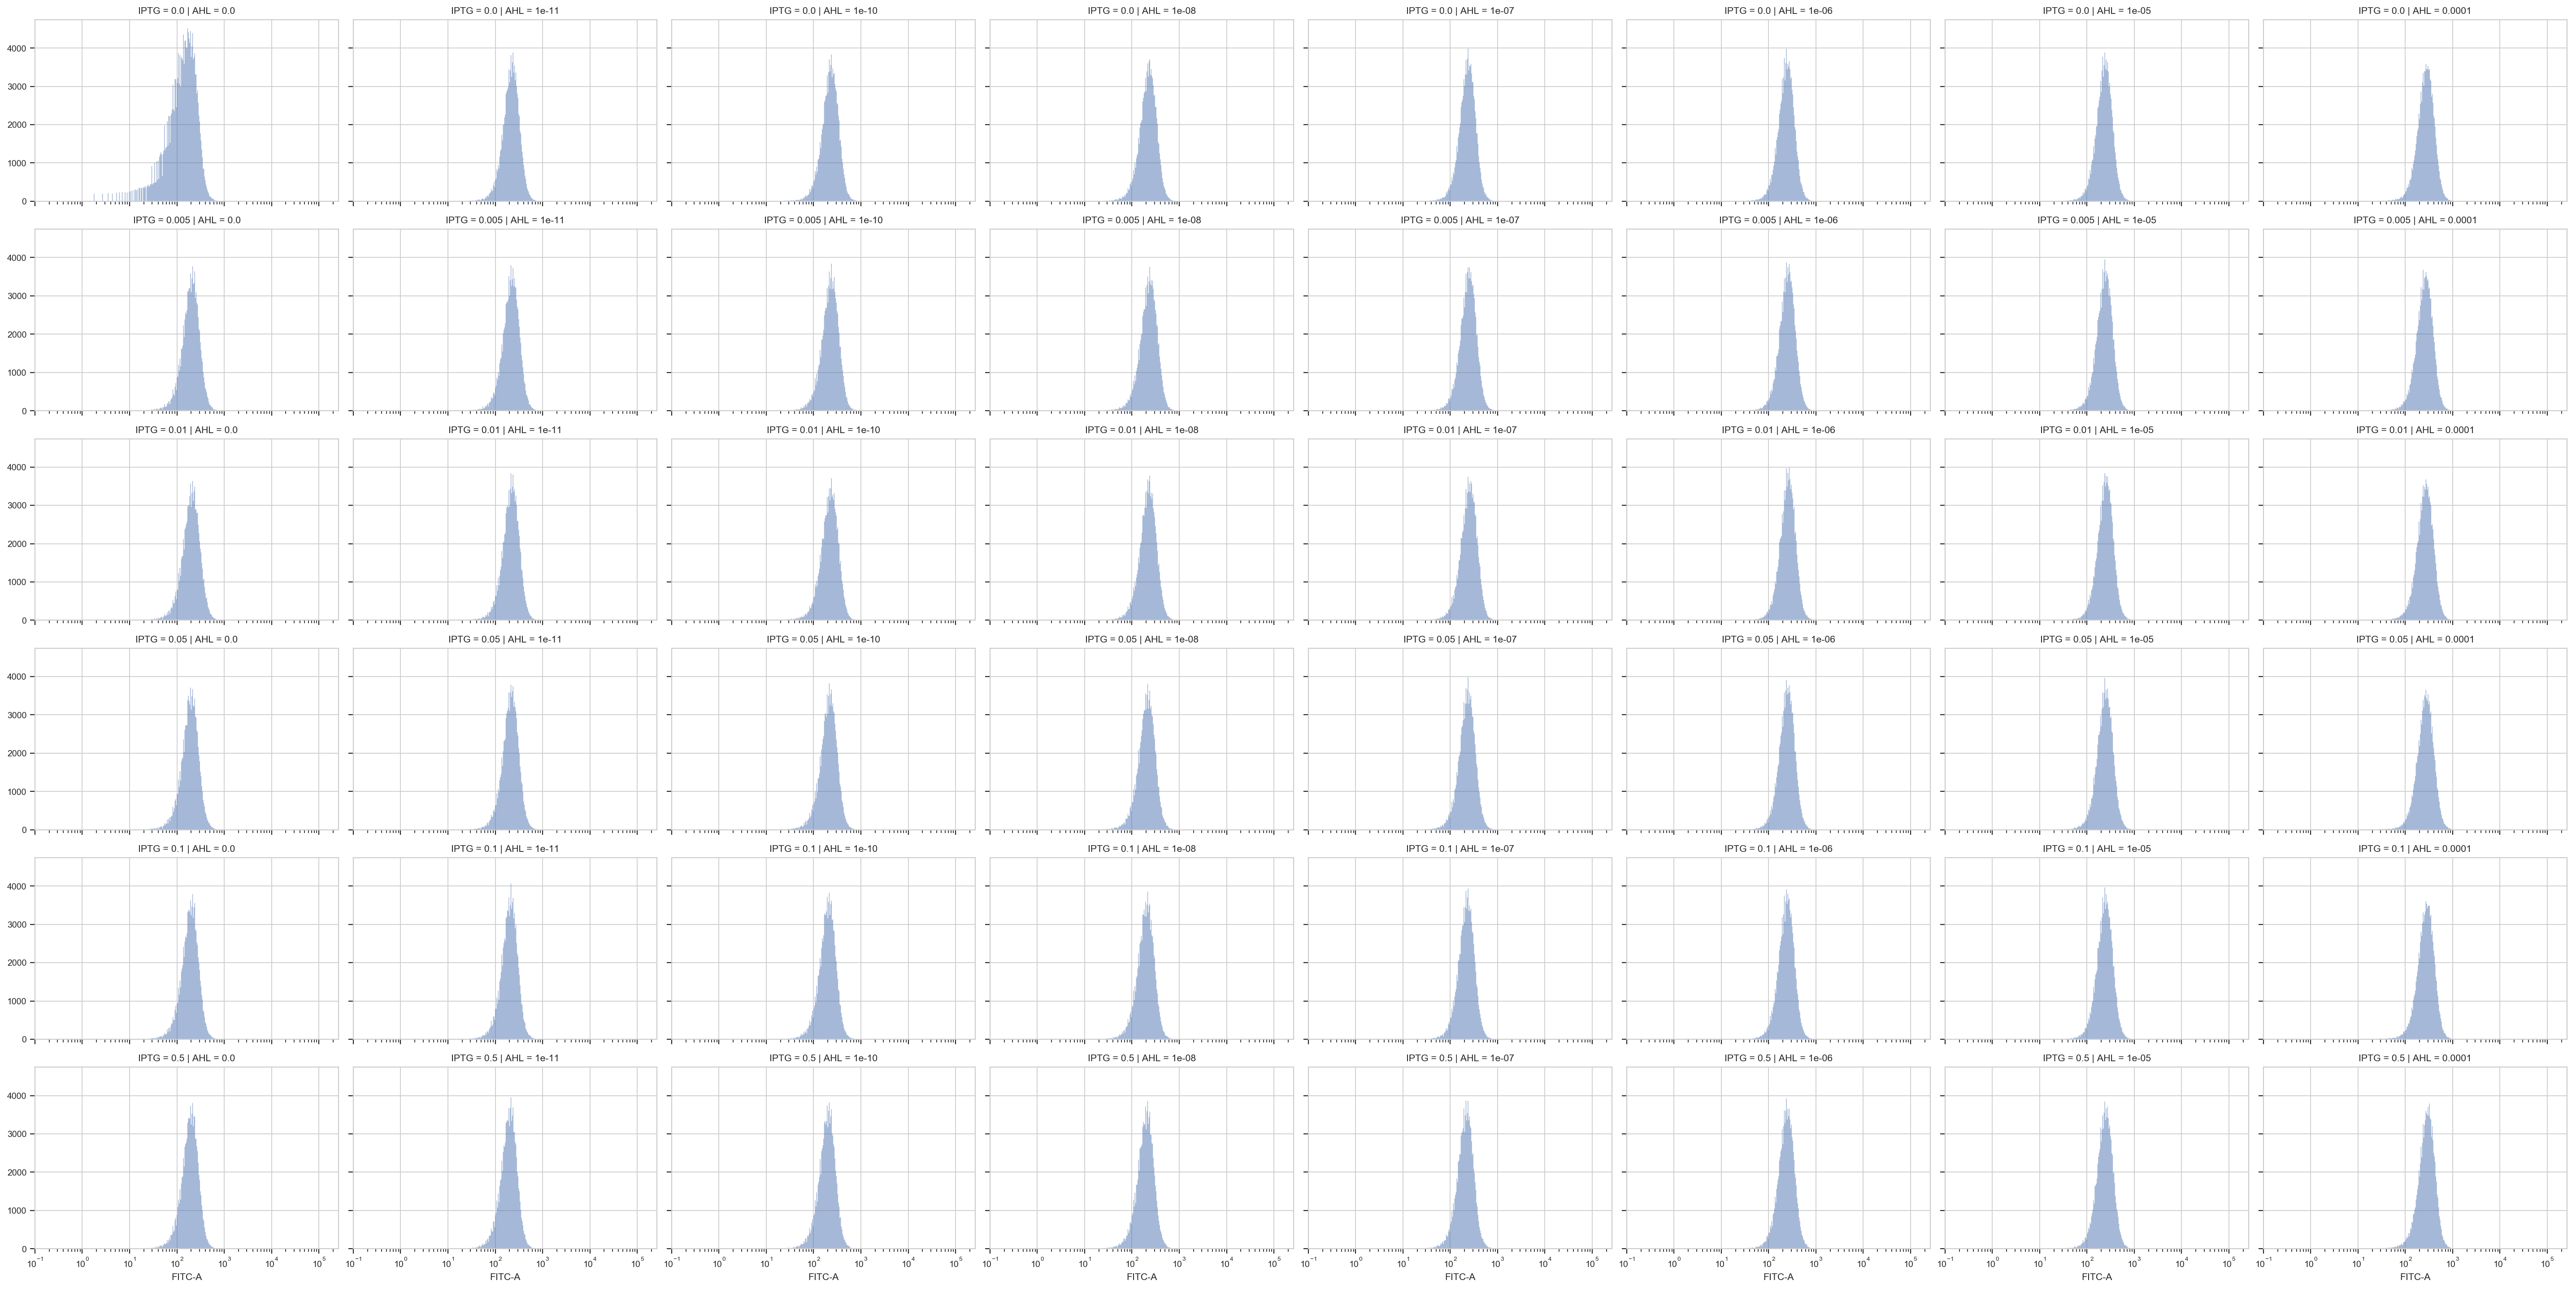

In [5]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = "AHL",
                  yfacet = 'IPTG').plot(ex)

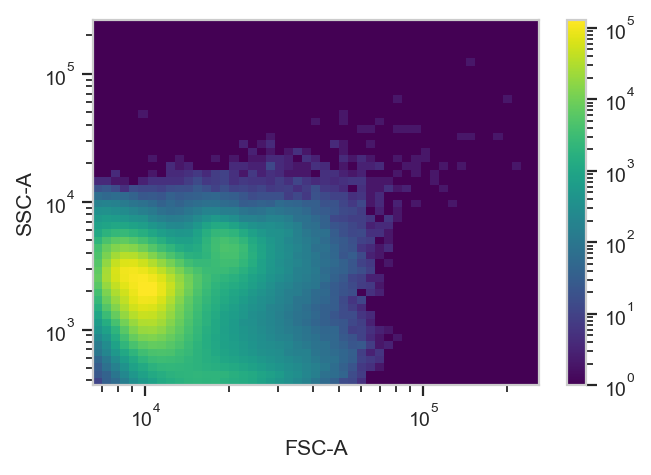

In [6]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

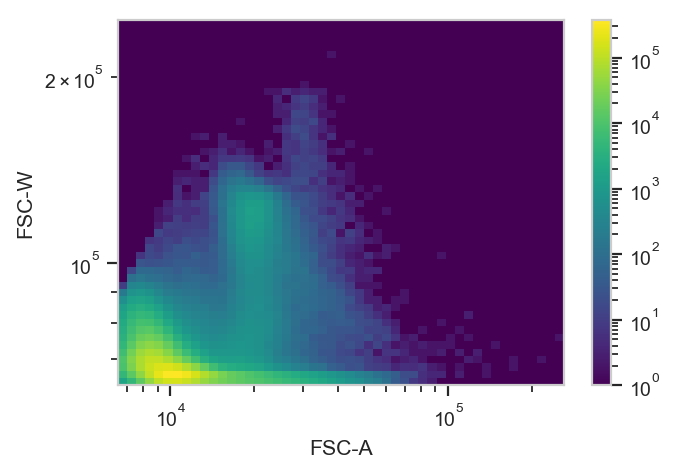

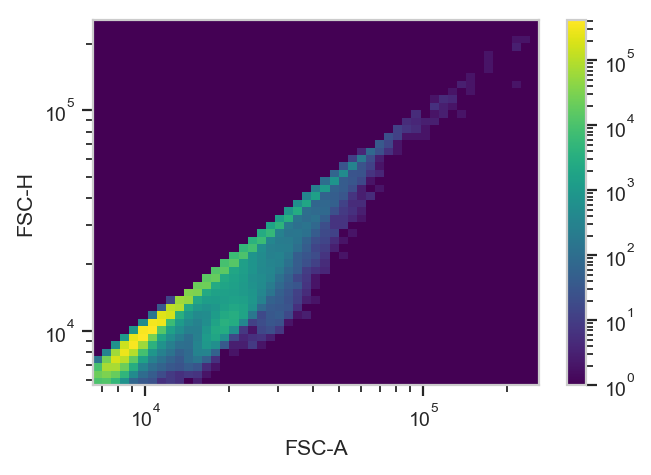

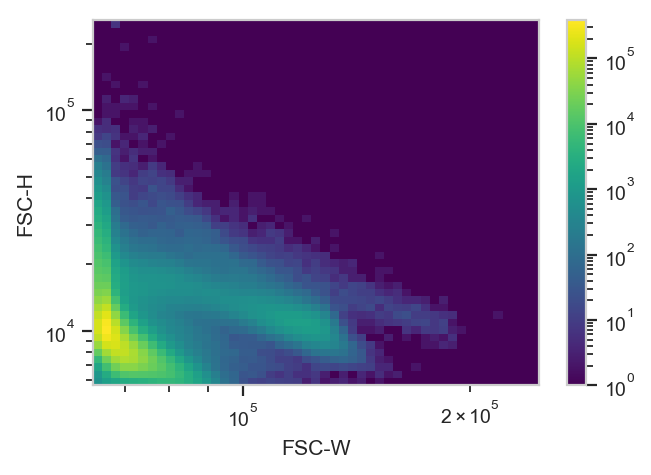

In [7]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


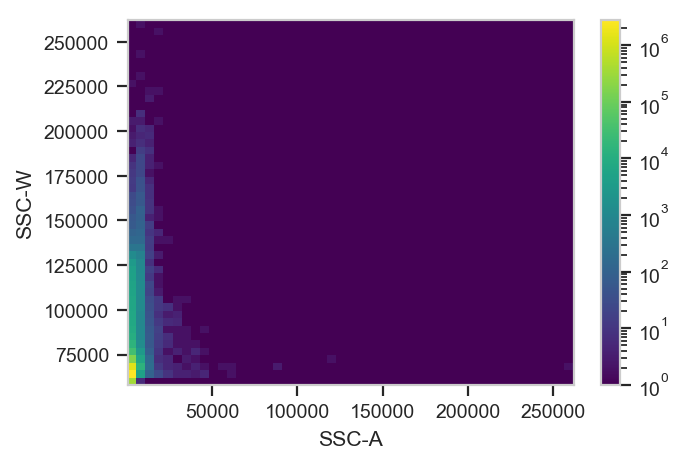

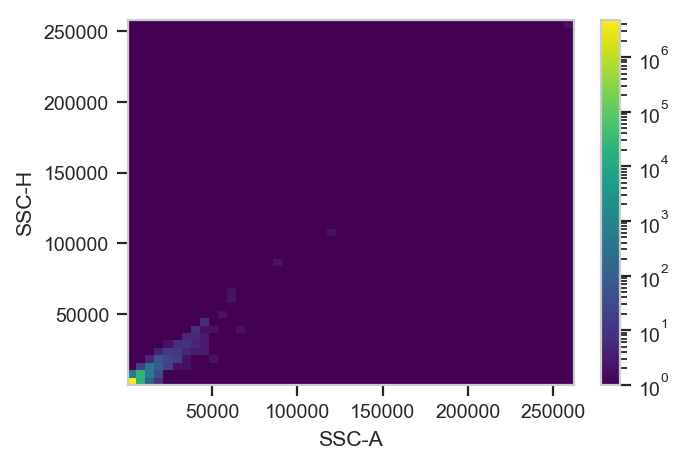

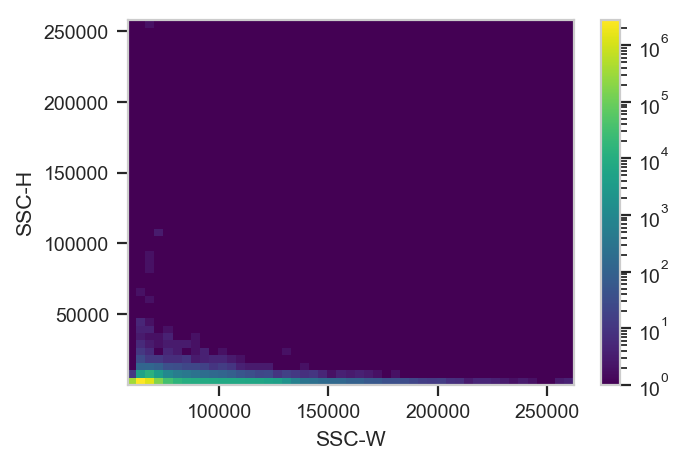

In [8]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

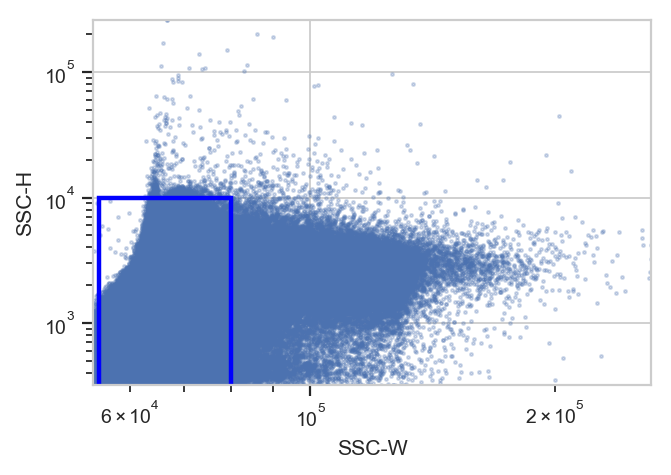

In [9]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log')

rv.plot(ex)
ex2 = r.apply(ex)

## Use a gaussian mixture model to further gate the population

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


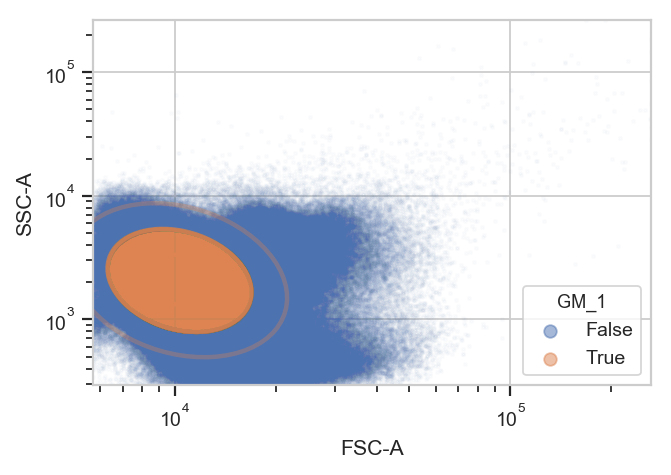

In [10]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


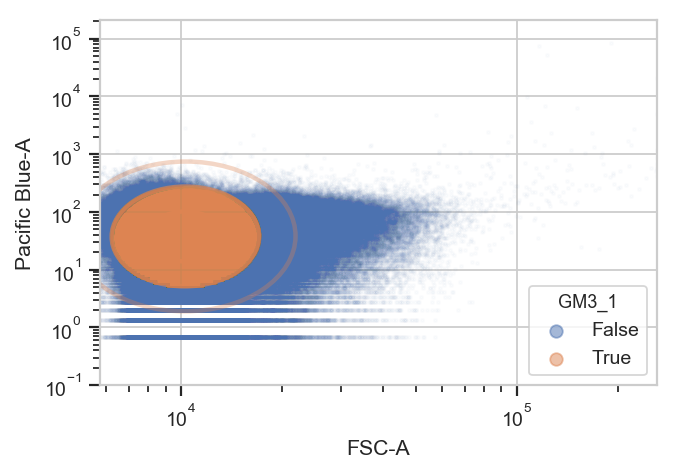

In [11]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
gm3.default_view().plot(ex_gm2, alpha = 0.02)

In [12]:
df =ex_gm2.data

take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [13]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df['FITC-A'] >0)]
df

,AHL,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,...,PerCP-Cy5-5-A,PerCP-Cy5-5-H,PerCP-Cy5-5-W,SSC-A,SSC-H,SSC-W,Time,Range2D,GM_1,GM3_1
0,0.0,131.240005,69.0,124651.375000,125.839996,103.0,80068.445312,13861.240234,13715.0,66234.796875,...,9607.839844,10481.0,60076.265625,1672.000000,1751.0,62579.210938,51.299999,True,True,True
4,0.0,61.200001,80.0,50135.039062,73.040001,123.0,38916.667969,14502.180664,14447.0,65786.320312,...,10431.519531,10548.0,64812.292969,1649.119995,1759.0,61442.140625,51.400002,True,True,True
5,0.0,80.919998,56.0,94699.515625,67.760002,90.0,49341.328125,12875.010742,12702.0,66428.656250,...,13306.479492,13372.0,65214.886719,2309.119873,2410.0,62792.730469,51.400002,True,True,True
6,0.0,17.000000,64.0,17408.000000,73.040001,96.0,49861.972656,12527.530273,12724.0,64524.066406,...,7606.719727,7620.0,65421.781250,1327.040039,1296.0,67105.625000,51.400002,True,True,True
7,0.0,-53.040001,64.0,0.000000,8.800000,83.0,6948.395508,12149.390625,12119.0,65700.343750,...,12332.320312,11108.0,72759.359375,2786.080078,2727.0,66955.828125,51.400002,True,True,True
9,0.0,85.000000,100.0,55705.601562,126.720001,65.0,127764.953125,12143.550781,12389.0,64237.609375,...,10604.879883,11200.0,62053.699219,2154.239990,2273.0,62111.867188,51.500000,True,True,True
10,0.0,89.080002,76.0,76815.093750,47.520000,52.0,59889.820312,10668.950195,10752.0,65029.789062,...,12657.919922,11960.0,69360.328125,1701.040039,1680.0,66356.765625,51.500000,True,True,True
16,0.0,-8.840000,75.0,0.000000,31.680000,35.0,59319.445312,12666.959961,12522.0,66294.671875,...,10526.559570,10931.0,63111.210938,1546.160034,1520.0,66663.914062,51.900002,True,True,True
17,0.0,45.560001,45.0,66351.562500,43.119999,110.0,25690.111328,9070.980469,8890.0,66870.171875,...,7615.520020,8729.0,57176.160156,1073.599976,1098.0,64079.648438,52.000000,True,True,True
22,0.0,114.919998,93.0,80982.765625,106.479996,126.0,55383.121094,15784.790039,15594.0,66337.820312,...,11532.400391,12233.0,61782.671875,1425.599976,1422.0,65701.914062,52.099998,True,True,True


In [14]:
df.columns 



Index(['AHL', 'AmCyan-A', 'AmCyan-H', 'AmCyan-W', 'FITC-A', 'FITC-H', 'FITC-W',
       'FSC-A', 'FSC-H', 'FSC-W', 'Family', 'IPTG', 'Pacific Blue-A',
       'Pacific Blue-H', 'Pacific Blue-W', 'PerCP-Cy5-5-A', 'PerCP-Cy5-5-H',
       'PerCP-Cy5-5-W', 'SSC-A', 'SSC-H', 'SSC-W', 'Time', 'Range2D', 'GM_1',
       'GM3_1'],
      dtype='object')

In [16]:
data = df[['FITC-A','AHL','IPTG','Family']]
data.insert(4,'Replicate',1)
data.to_pickle('../compiled-data/se/tra/TraSE_1.pkl')
#uncomment these when you are ready to save replicates and compile replicate from other runs

In [17]:
# Subtract WT background from samples
data = df[['FITC-A','AHL','IPTG','Family']]
data['FITC-A'] = data['FITC-A'] - data[data.Family=='WT']['FITC-A'].median()
data['FITC-A'] = data[data['FITC-A'] > 0]['FITC-A']
data = data[data.Family=='TraR']
data.drop('Family',inplace=True,axis=1)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
data['FITC-A'].min()

0.8800048828125

In [19]:
data

,FITC-A,AHL,IPTG
100002,57.199997,0.0001,0.0
100004,254.320007,0.0001,0.0
100006,312.399994,0.0001,0.0
100007,142.559998,0.0001,0.0
100011,271.920013,0.0001,0.0
100012,222.640015,0.0001,0.0
100013,328.239990,0.0001,0.0
100014,237.600006,0.0001,0.0
100015,267.519989,0.0001,0.0
100017,165.440002,0.0001,0.0


# Plot median FITC-A

use median or geometeric mean 

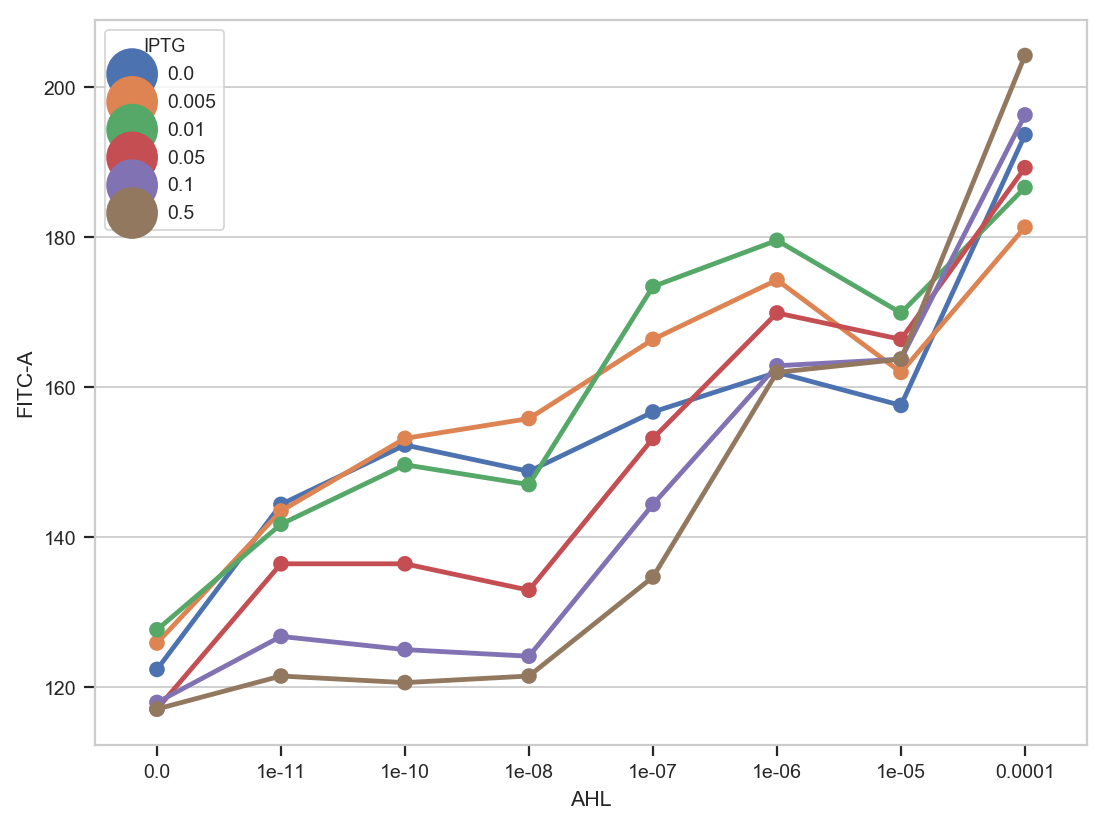

In [20]:
mfi = data.groupby(['AHL','IPTG'])['FITC-A'].median().reset_index()

f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',data=mfi)
f.savefig('Las.png',dpi=600)

# Plot heatmaps showing absolute and relative induction

Raw signal 

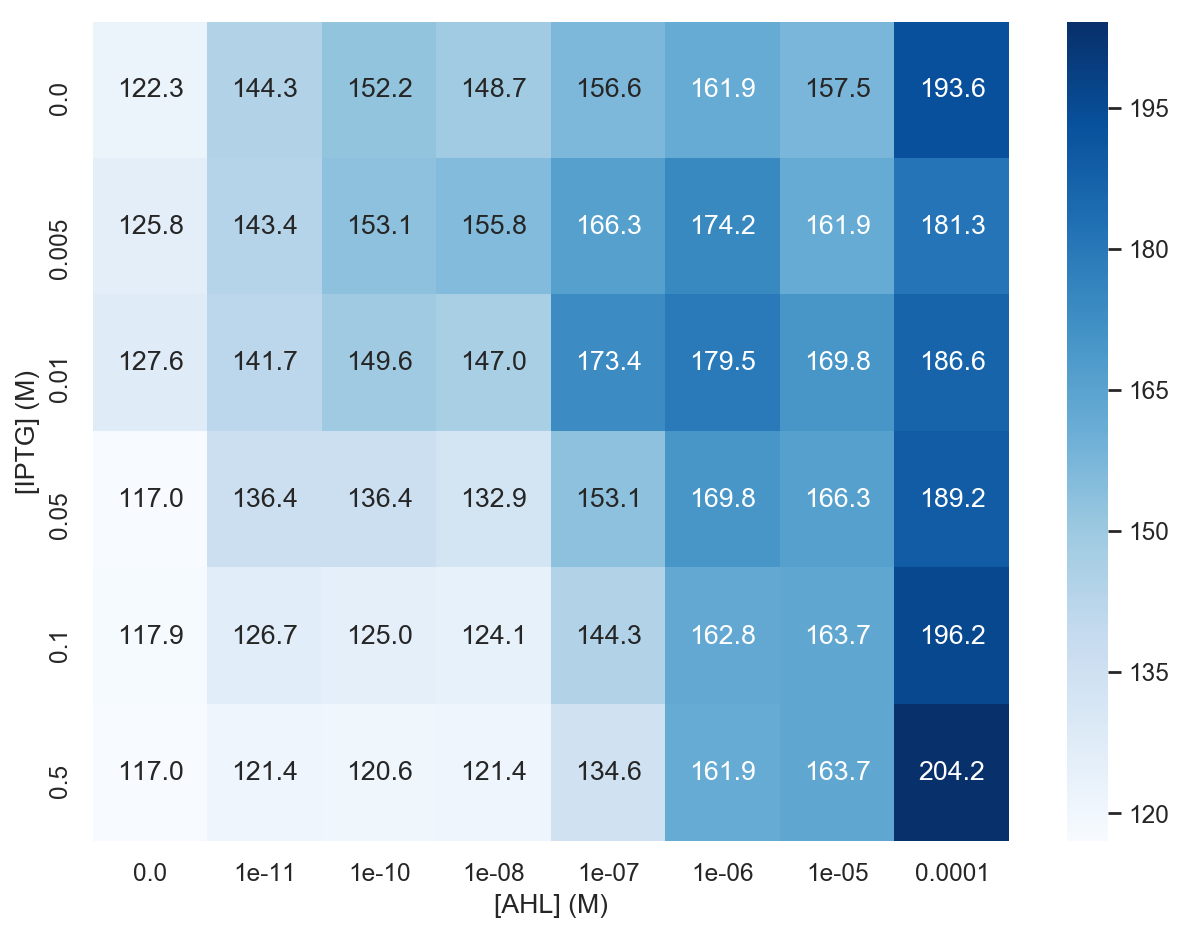

In [21]:
#LasMeans = Las.groupby(['C_ahl','C_iptg']).mean().reset_index()
sns.set(style="white")
#sns.set_style('Talk')
#LasTable = pd.pivot_table(LasMeans,values='FITC-A',index='C_iptg',columns='C_ahl')
f, ax = plt.subplots(figsize=(8,6))
#g = sns.heatmap(LasTable,vmin=0,vmax=100,xticklabels=[0,1e-10,1e-9,1e-7],yticklabels=[0,1e-3,1e-4,1e-5],ax=ax,square=True,cmap='Reds')



#f.savefig('LasHeatmap.png',dpi=600)

#mean['FITC-A']=mean['FITC-A']/mean['FITC-A'].max()*100

piv = mfi.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
#cbar.set_ticks([0, 25, 50, 75,100])
#cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

Normalized to highest signal 

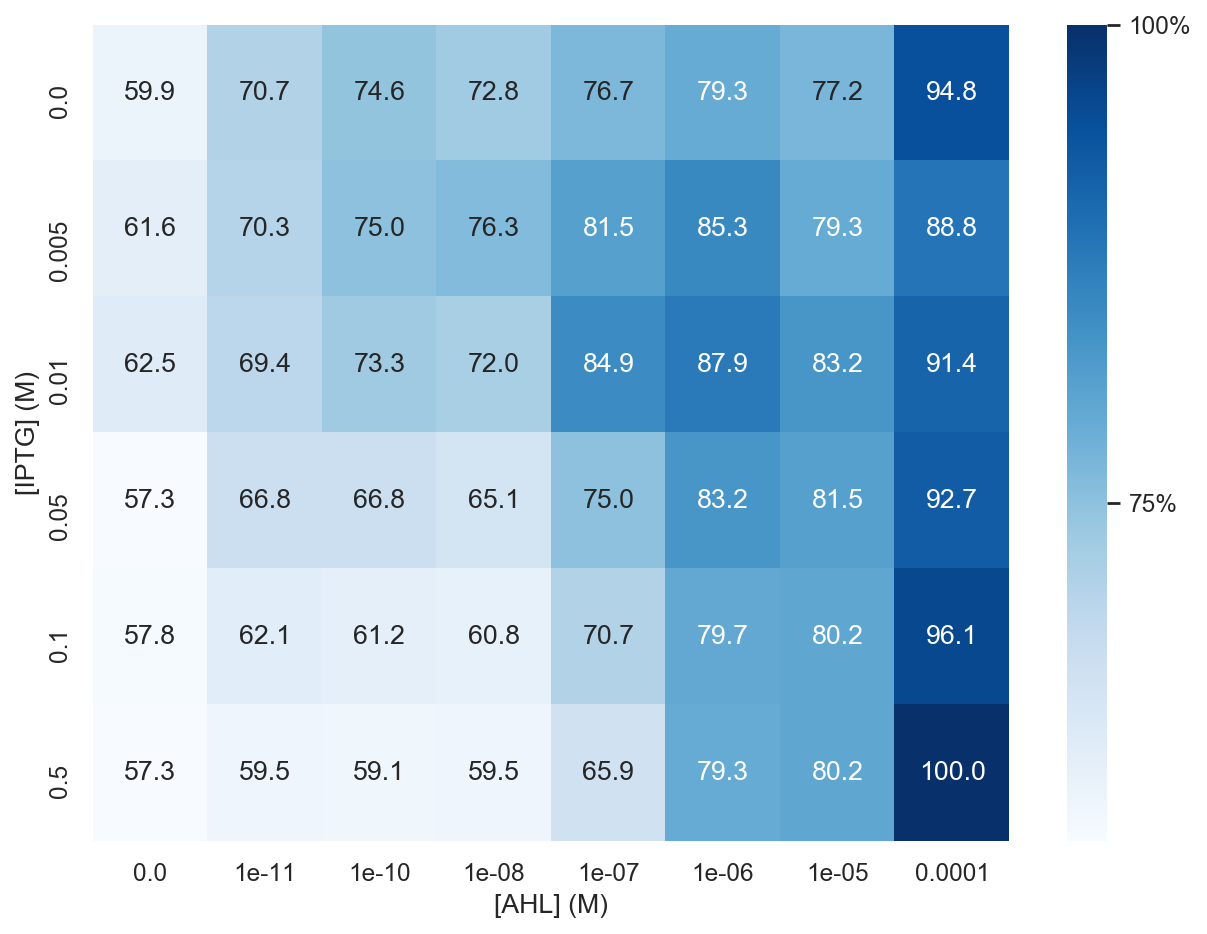

In [22]:
f, ax = plt.subplots(figsize=(8,6))
# normalized
norm = mfi.copy()
norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100

piv = norm.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

# Calculate the on/off ratio and plot

In [23]:

R =[]
for i in mfi.IPTG.unique():
    tmp = mfi[mfi.IPTG ==i]['FITC-A'].max()/mfi[mfi.IPTG ==i]['FITC-A'].min()
    R.append([i,tmp])



In [24]:

R = pd.DataFrame(R,columns=['IPTG','Induction Ratio'])
R

,IPTG,Induction Ratio
0,0.000,1.582734
1,0.005,1.440559
2,0.010,1.462069
3,0.050,1.616541
4,0.100,1.664179
5,0.500,1.744361


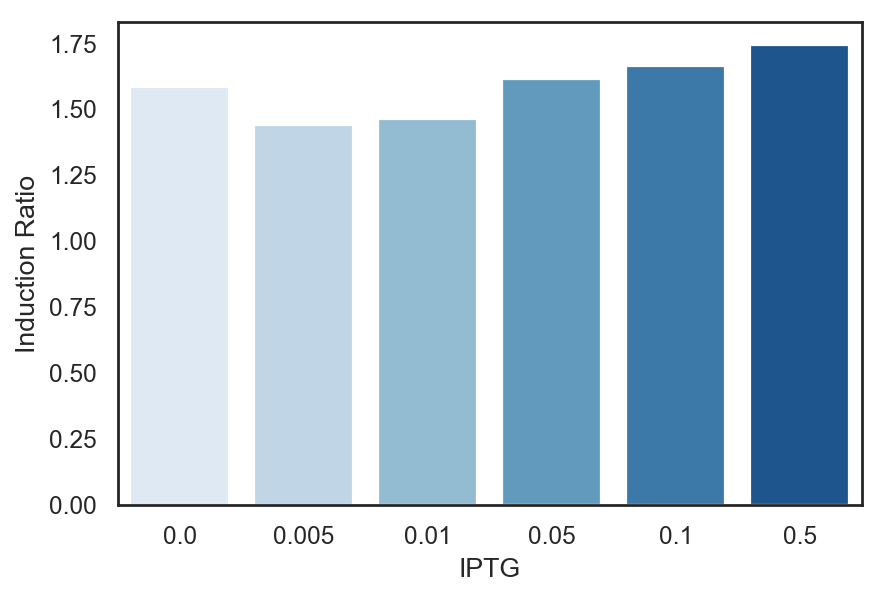

In [25]:
f, ax  = plt.subplots()
sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues')

STOP HERE